In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading Dataset MNIST**

In [101]:
from keras.datasets import fashion_mnist

(X_train , y_train ) , (X_test,y_test) = fashion_mnist.load_data()

In [102]:
len(X_train) , len(y_train ) , len(X_test) , len(y_test)

(60000, 60000, 10000, 10000)

In [103]:
X_train.shape

(60000, 28, 28)

In [104]:
y_train.shape

(60000,)

In [105]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [106]:
y_train[1]

0

In [110]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [111]:
classes[7]

'Sneaker'

In [112]:
def plot_digit(X_train , y_train , index):
  plt.figure(figsize=(2,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y_train[index]])

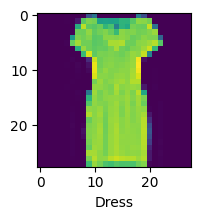

In [117]:
plot_digit(X_train , y_train , 20)

In [118]:
X_train = X_train / 255
X_test = X_test / 255

**ANN**

In [122]:
from keras import models , layers , Sequential

ann = Sequential([
    # Dense
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1000,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(500,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(400,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(200,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(100,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax")
])


ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [124]:
ann.fit(X_train , y_train , epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8277 - loss: 0.5074
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8310 - loss: 0.4980
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8324 - loss: 0.4985
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8300 - loss: 0.5059
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8331 - loss: 0.4984
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8320 - loss: 0.5018
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8364 - loss: 0.4819
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8383 - loss: 0.4807
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8359 - loss: 0.4841
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8342 - loss: 0.4886
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8313 - loss: 0.5003
Epoch 12/30
1875/1875 ━━━━━━━

In [125]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8640 - loss: 0.4273


[0.4324682056903839, 0.8622999787330627]

In [126]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = [np.argmax(ele) for ele in y_pred_ann]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [127]:
y_pred_ann[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [128]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [133]:
classes[9]

'Ankle boot'

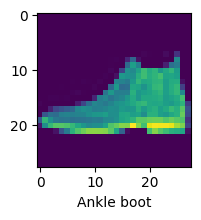

In [132]:
plot_digit(X_test,y_test,0)

In [134]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test,y_pred_ann)
cm

array([[811,   2,   8,  33,   5,   1, 132,   0,   8,   0],
       [  2, 961,   0,  29,   2,   0,   5,   0,   1,   0],
       [  9,   1, 686,   7, 216,   0,  78,   0,   3,   0],
       [ 17,   4,   2, 891,  36,   0,  48,   0,   2,   0],
       [  0,   1,  52,  34, 849,   0,  60,   0,   4,   0],
       [  0,   0,   0,   0,   0, 913,   0,  44,   3,  40],
       [133,   1,  96,  29, 116,   0, 609,   0,  16,   0],
       [  0,   0,   0,   0,   0,   4,   0, 962,   0,  34],
       [  0,   0,   0,   2,   4,   0,  13,   5, 976,   0],
       [  0,   0,   0,   0,   0,   3,   1,  31,   0, 965]])

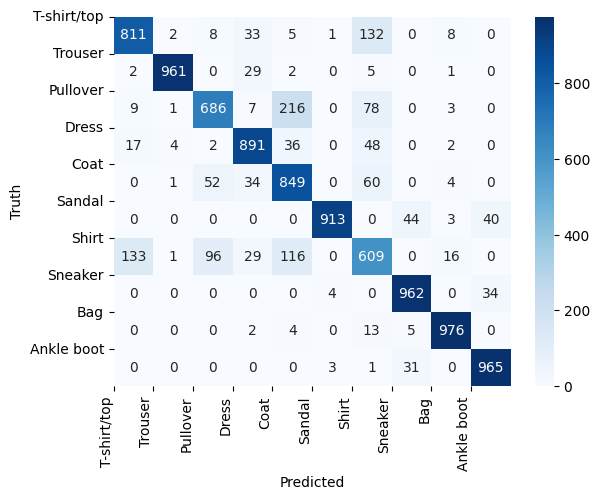

In [140]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.xticks(ticks=range(len(classes)), labels=classes, rotation=90, ha="right")
plt.yticks(ticks=range(len(classes)), labels=classes, rotation=0)
plt.show()

In [141]:
print("Classification Report \n",classification_report(y_test,y_pred_ann))

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.69      0.74      1000
           3       0.87      0.89      0.88      1000
           4       0.69      0.85      0.76      1000
           5       0.99      0.91      0.95      1000
           6       0.64      0.61      0.63      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**CNN**

In [142]:
from keras import models , layers , Sequential

cnn = Sequential([
    # CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    # Dense
    layers.Flatten(),
    layers.Dense(200,activation="relu"),
    # layers.Dropout(0.5)
    layers.Dense(10,activation="softmax")
])


cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7639 - loss: 0.6646
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8761 - loss: 0.3376
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8949 - loss: 0.2863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9049 - loss: 0.2570
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9133 - loss: 0.2367
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9197 - loss: 0.2162
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9264 - loss: 0.1963
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9313 - loss: 0.1835
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9359 - loss: 0.1673
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0.1557


In [144]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9047 - loss: 0.2955


[0.2873404622077942, 0.9060999751091003]

In [145]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn = [np.argmax(ele) for ele in y_pred_cnn]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [146]:
y_pred_cnn[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [147]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [149]:
classes[2]

'Pullover'

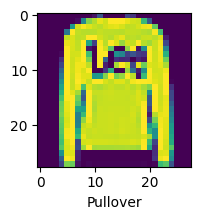

In [148]:
plot_digit(X_test,y_test,1)

In [150]:
cm_cnn = confusion_matrix(y_test,y_pred_cnn)
cm_cnn

array([[846,   2,  20,  23,   1,   0,  99,   0,   9,   0],
       [  2, 984,   0,   9,   1,   0,   2,   0,   2,   0],
       [ 15,   3, 893,  15,  32,   0,  40,   0,   2,   0],
       [  8,   6,   6, 952,  10,   0,  13,   0,   5,   0],
       [  2,   0,  80,  47, 802,   0,  65,   0,   4,   0],
       [  0,   0,   0,   0,   0, 984,   0,  11,   0,   5],
       [103,   3,  74,  33,  51,   0, 724,   1,  11,   0],
       [  0,   0,   0,   0,   0,  13,   0, 981,   0,   6],
       [  3,   2,   4,   4,   0,   1,   4,   2, 979,   1],
       [  1,   0,   0,   0,   0,   7,   0,  76,   0, 916]])

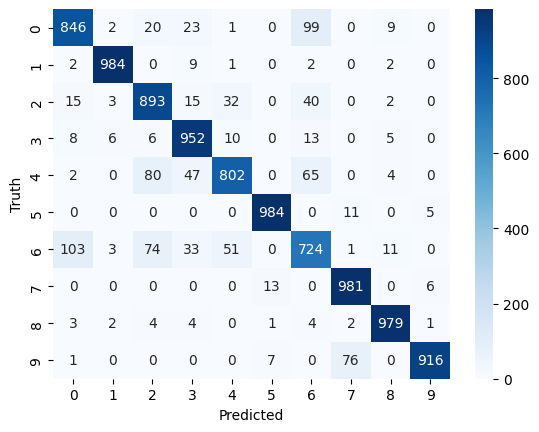

In [154]:
sns.heatmap(cm_cnn,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [155]:
print("Classificatino Report \n" , classification_report(y_test,y_pred_cnn))

Classificatino Report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.89      0.86      1000
           3       0.88      0.95      0.91      1000
           4       0.89      0.80      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.72      0.74      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.99      0.92      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

